<a href="https://colab.research.google.com/github/marcinwolter/RATS/blob/main/simple_autoencoder_RATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple autoencoder for RATS behaviour**

In [ ]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

In [ ]:
from time import time
import numpy as np
import keras.backend as K
from tensorflow.python.keras.layers import Layer, InputSpec
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import sklearn.metrics



# Read MNIST data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_train = x_train / 255.
x_test = x_test / 255.

11490434/11490434 [==============================] - 2s 0us/step


# Hyperparameters

In [ ]:
encoding_dim = 2
batch_size = 128
epochs = 200

 # Build autoencoder



In [ ]:


# This is our input image
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
#encoded = Dropout(0.2)(encoded)
encoded = Dense(encoding_dim, activation='linear')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
#decoded = Dropout(0.2)(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
 dense_3 (Dense)             (None, 256)               768       
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 784)               402192

# Train the autoencoder

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, batch_size=batch_size, epochs=epochs)

Epoch 1/200
469/469 [==============================] - 7s 7ms/step - loss: 0.2334
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.1980
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: 0.1885
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1843
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1817
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1795
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1772
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1753
Epoch 9/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1742
Epoch 10/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1735
Epoch 11/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1724
Epoch 12/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1718
Epoch 13/200


# Plot history

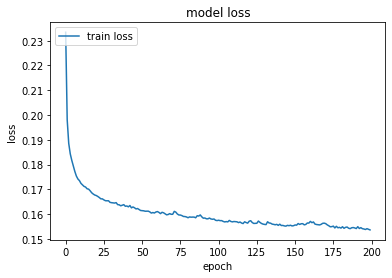

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt

print(history)
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss'], loc='upper left')
plt.show()

# Plot clusters

313/313 [==============================] - 0s 1ms/step
(10000, 2)


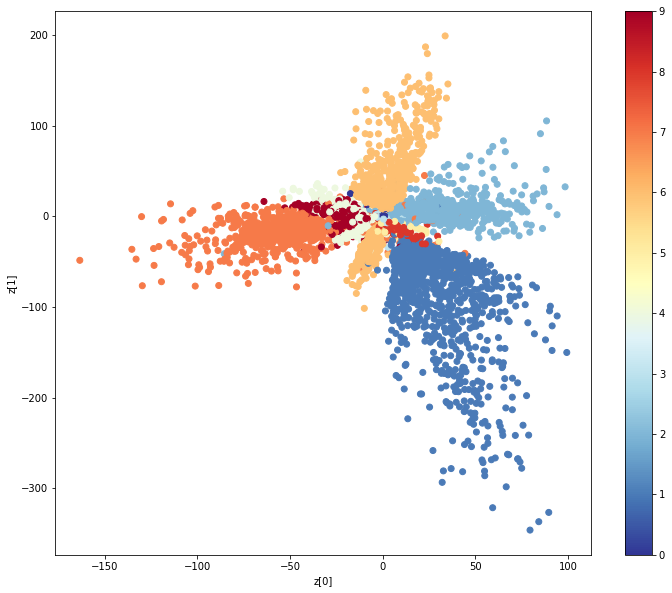

In [ ]:
import matplotlib.pyplot as plt

def plot_label_clusters(encoded, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(data.reshape(len(data),784))
    print(z.shape)
    plt.figure(figsize=(12, 10))
    plt.scatter(z[:, 0], z[:, 1], c=labels, cmap="RdYlBu_r")
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()




plot_label_clusters(encoded, x_test, y_test)

# Plot digits

313/313 [==============================] - 1s 2ms/step


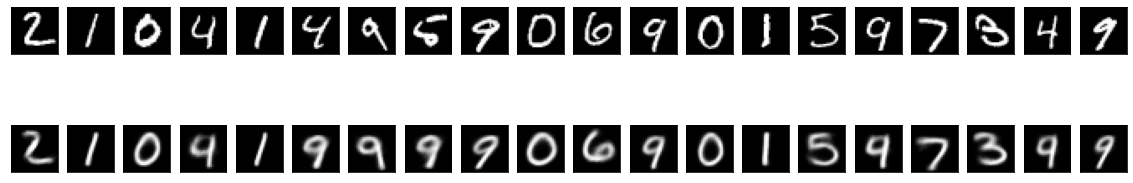

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 20
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()